In [1]:
import os
import sys
import time
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:

from sklearn.datasets import load_wine

wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)


df['target'] = wine.target

df.sample(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
143,13.62,4.95,2.35,20.0,92.0,2.00,0.80,0.47,1.02,4.40,0.91,2.05,550.0,2
30,13.73,1.50,2.70,22.5,101.0,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285.0,0
27,13.30,1.72,2.14,17.0,94.0,2.40,2.19,0.27,1.35,3.95,1.02,2.77,1285.0,0
85,12.67,0.98,2.24,18.0,99.0,2.20,1.94,0.30,1.46,2.62,1.23,3.16,450.0,1
169,13.40,4.60,2.86,25.0,112.0,1.98,0.96,0.27,1.11,8.50,0.67,1.92,630.0,2
76,13.03,0.90,1.71,16.0,86.0,1.95,2.03,0.24,1.46,4.60,1.19,2.48,392.0,1
49,13.94,1.73,2.27,17.4,108.0,2.88,3.54,0.32,2.08,8.90,1.12,3.10,1260.0,0
140,12.93,2.81,2.70,21.0,96.0,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600.0,2
159,13.48,1.67,2.64,22.5,89.0,2.60,1.10,0.52,2.29,11.75,0.57,1.78,620.0,2
23,12.85,1.60,2.52,17.8,95.0,2.48,2.37,0.26,1.46,3.93,1.09,3.63,1015.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [4]:
#To check null values

df.isnull().sum()

,0
alcohol,0
malic_acid,0
ash,0
alcalinity_of_ash,0
magnesium,0
total_phenols,0
flavanoids,0
nonflavanoid_phenols,0
proanthocyanins,0
color_intensity,0


In [5]:
# To split the data

X = df.iloc[: , :-1] # independent
y = df.iloc[: , -1] # dependent

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [6]:
X_train.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

**Outliers**

alcohol


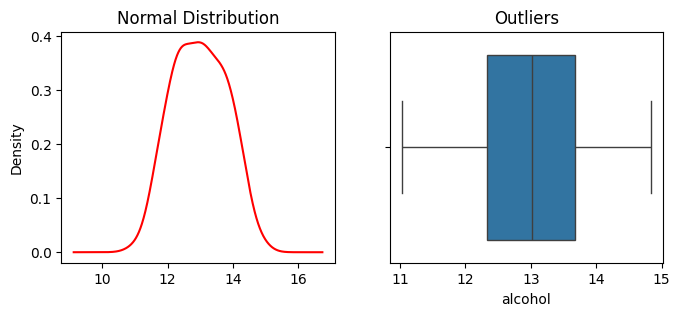

malic_acid


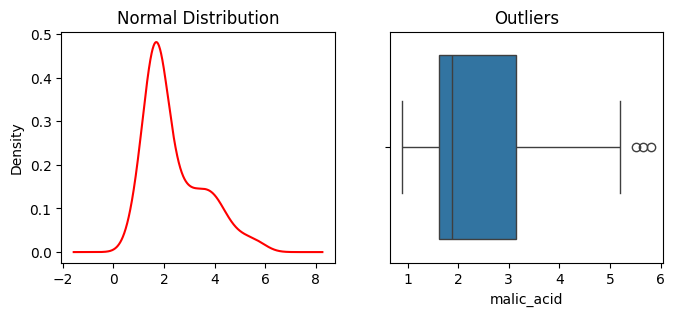

ash


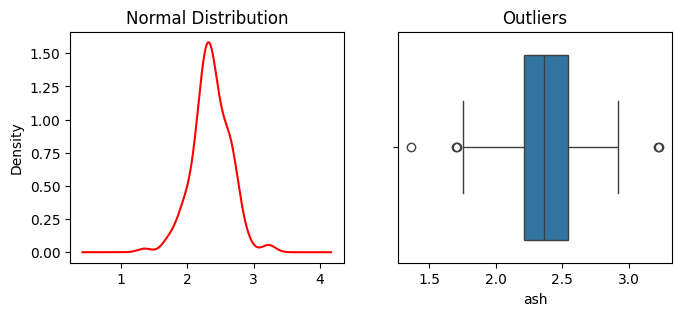

alcalinity_of_ash


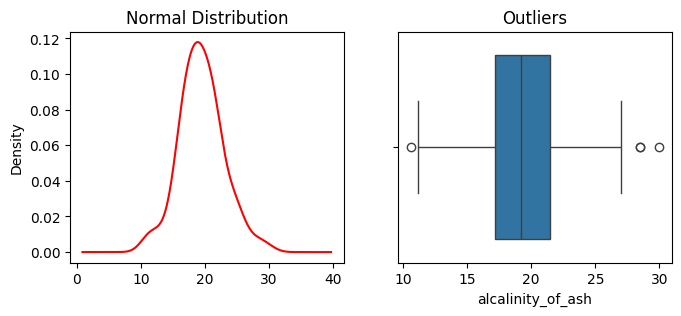

magnesium


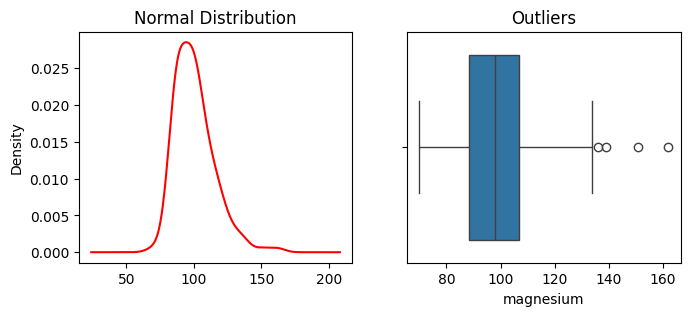

total_phenols


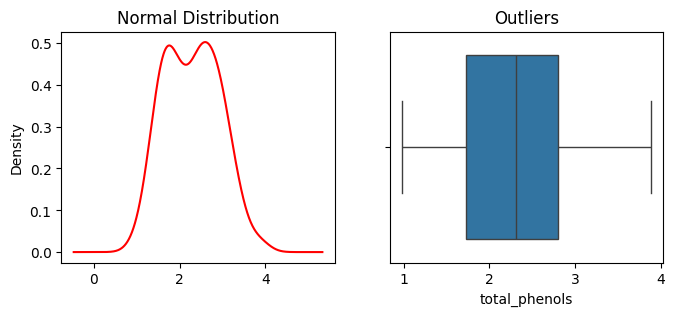

flavanoids


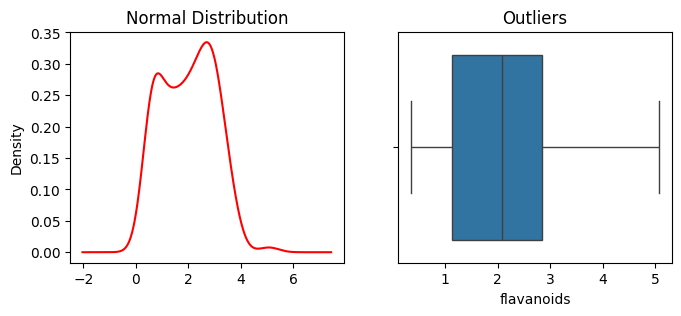

nonflavanoid_phenols


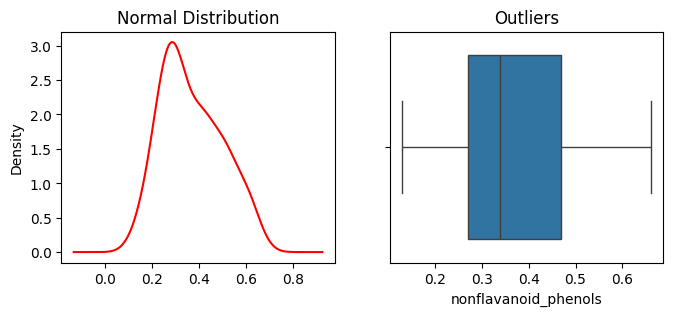

proanthocyanins


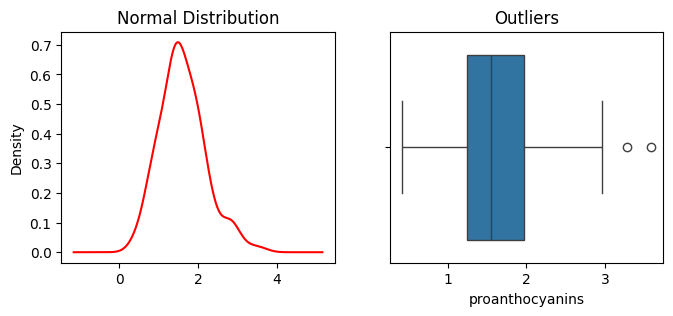

color_intensity


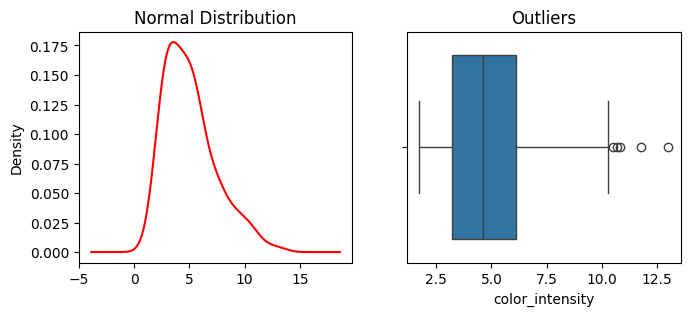

hue


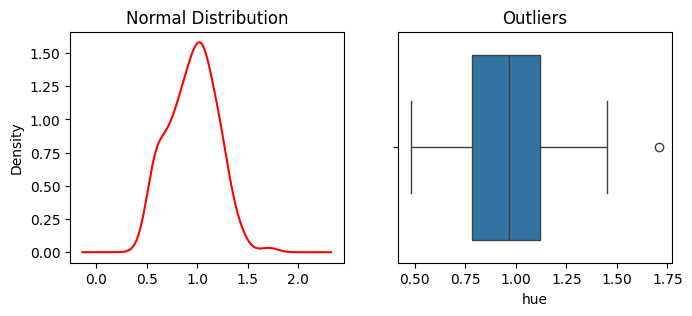

od280/od315_of_diluted_wines


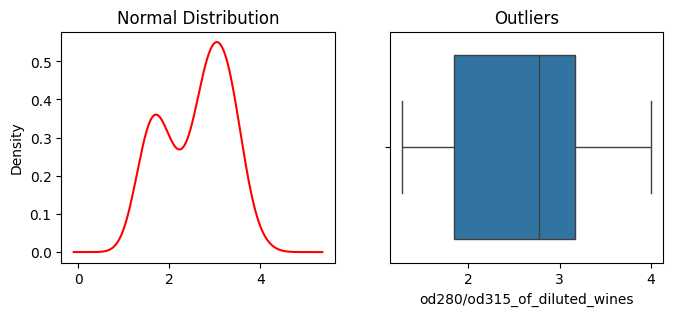

proline


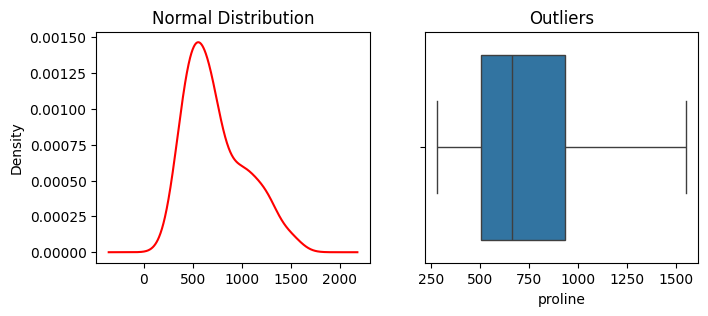

In [7]:
# to check each column outliers
def outlier_checking(X_train,var):
  print(var)
  plt.figure(figsize=(12,3))
  plt.subplot(1,3,1)
  plt.title('Normal Distribution')
  X_train[var].plot(kind='kde',color='r')
  plt.subplot(1,3,2)
  plt.title('Outliers')
  sns.boxplot(x = X_train[var])
  plt.show()

for i in X_train.columns:
  outlier_checking(X_train,i)

**To handle outliers**

trimming

capping

5th and 95th quantile





**5th and 95th quantile techniwue for above data**

In [8]:
def outlier_handling(X_train,var):
  upper_limit = X_train[var].quantile(0.95)
  lower_limit = X_train[var].quantile(0.05)

  return upper_limit,lower_limit


In [9]:
for i in X_train.columns:
  upper_limit,lower_limit = outlier_handling(X_train,i)
  X_train[i+'_5th'] = np.where(X_train[i] > upper_limit,upper_limit,
         np.where(X_train[i] < lower_limit,lower_limit,X_train[i]))

alcohol_5th


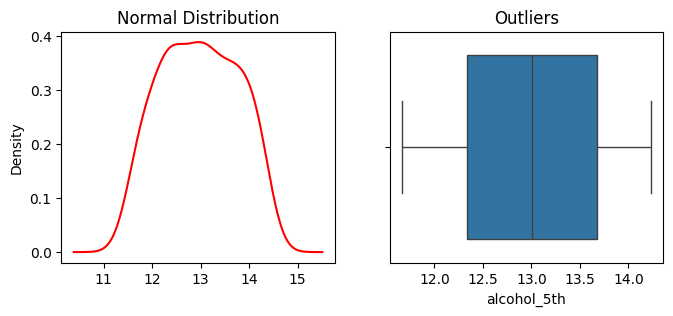

malic_acid_5th


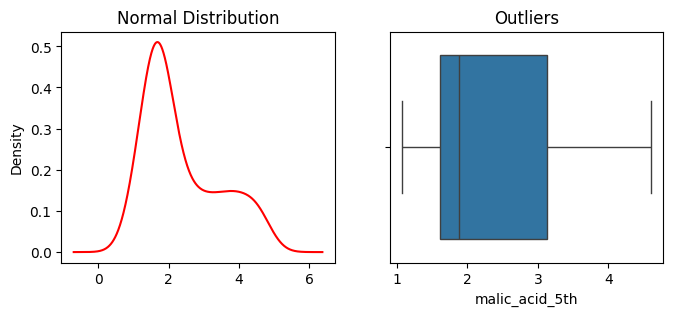

ash_5th


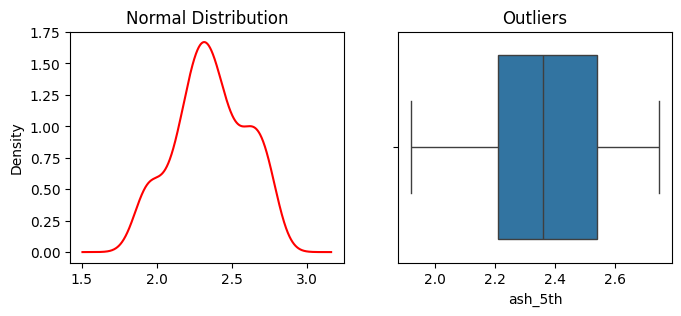

alcalinity_of_ash_5th


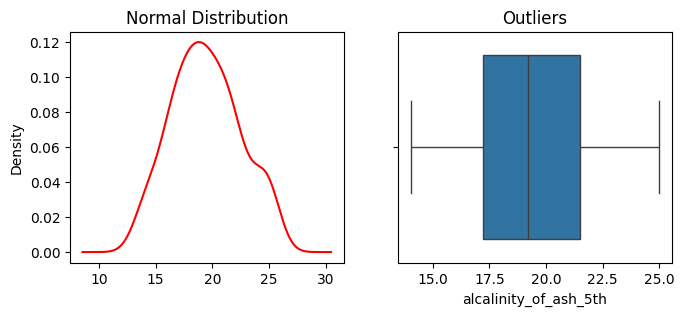

magnesium_5th


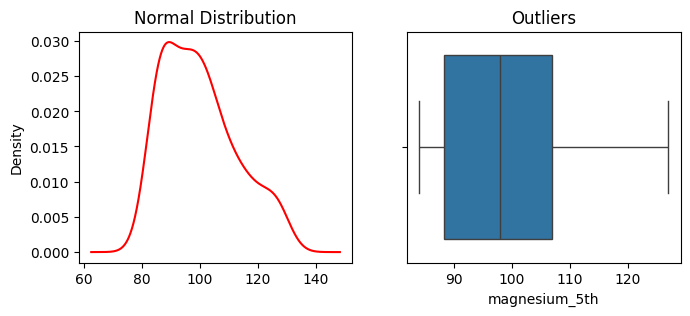

total_phenols_5th


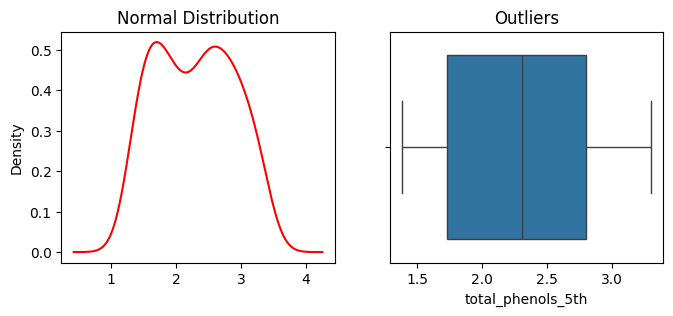

flavanoids_5th


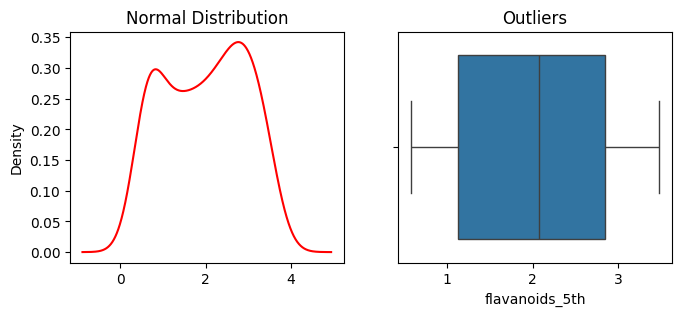

nonflavanoid_phenols_5th


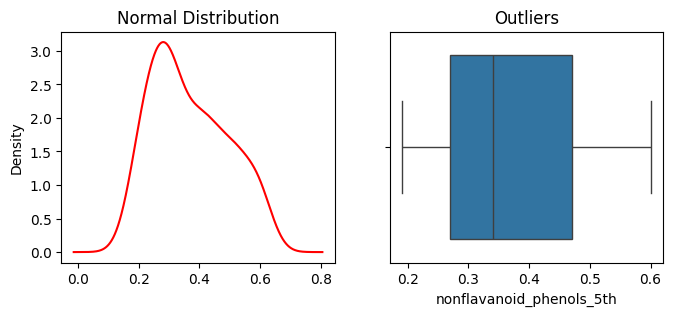

proanthocyanins_5th


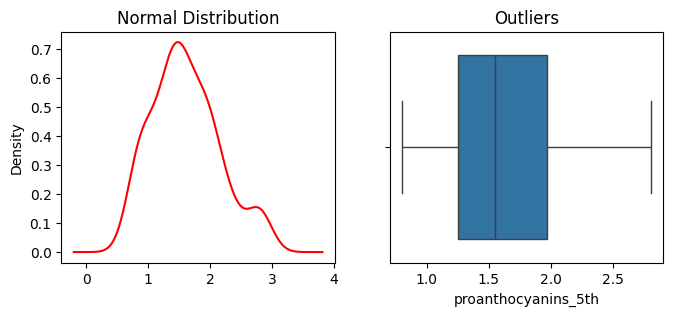

color_intensity_5th


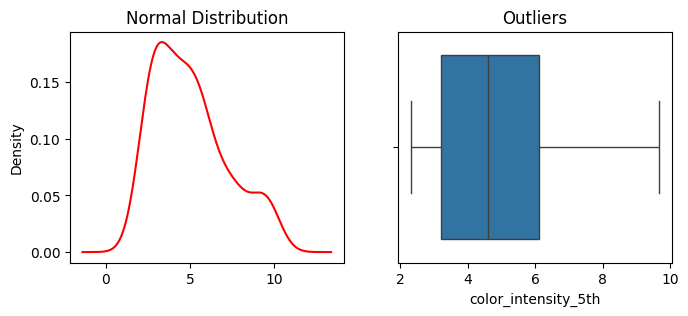

hue_5th


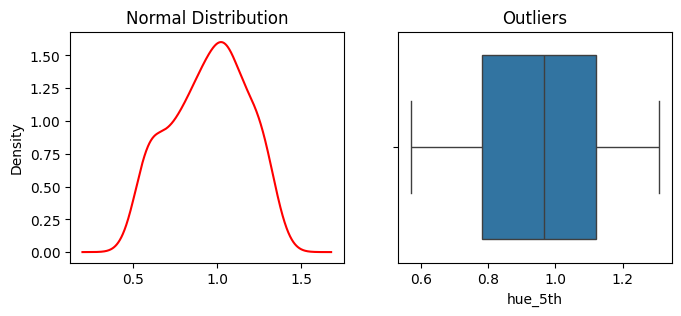

od280/od315_of_diluted_wines_5th


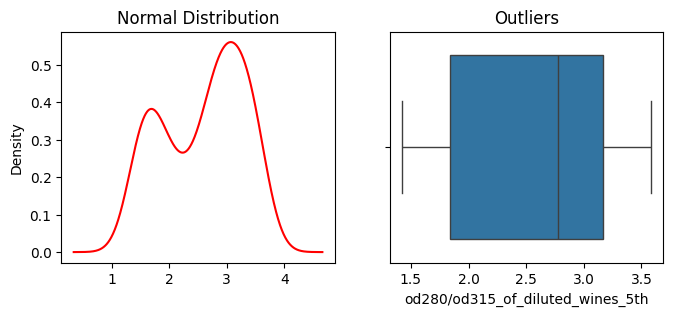

proline_5th


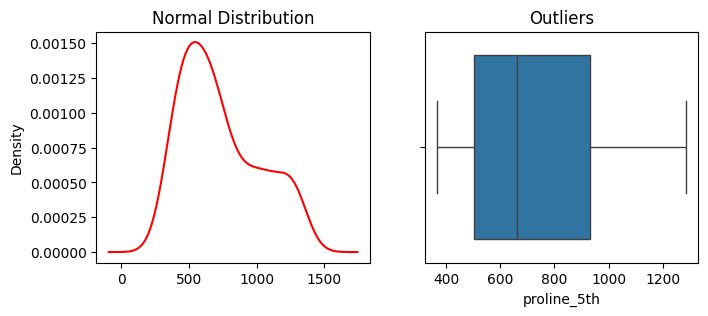

In [10]:
for i in X_train.columns:
  if '_5th' in i:
    outlier_checking(X_train,i)

In [11]:
X_train.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'alcohol_5th',
       'malic_acid_5th', 'ash_5th', 'alcalinity_of_ash_5th', 'magnesium_5th',
       'total_phenols_5th', 'flavanoids_5th', 'nonflavanoid_phenols_5th',
       'proanthocyanins_5th', 'color_intensity_5th', 'hue_5th',
       'od280/od315_of_diluted_wines_5th', 'proline_5th'],
      dtype='object')

In [12]:
# to remove original columns

X_train=X_train.drop(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],axis=1)

In [13]:
# X_test
def outlier_handling(X_test,var):
  upper_limit = X_test[var].quantile(0.95)
  lower_limit = X_test[var].quantile(0.05)

  return upper_limit,lower_limit


for i in X_test.columns:
  upper_limit,lower_limit = outlier_handling(X_test,i)
  X_test[i+'_5th'] = np.where(X_test[i] > upper_limit,upper_limit,
         np.where(X_test[i] < lower_limit,lower_limit,X_test[i]))


# to remove original columns

X_test=X_test.drop(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],axis=1)


alcohol_5th


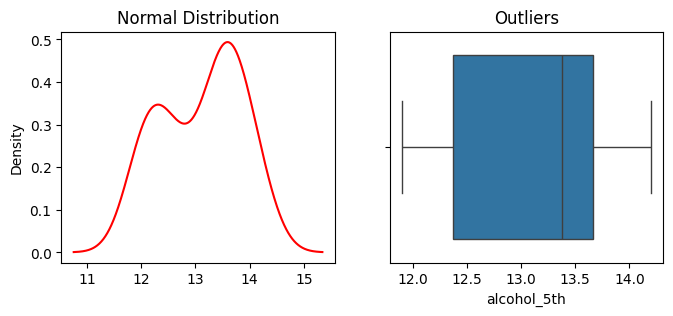

malic_acid_5th


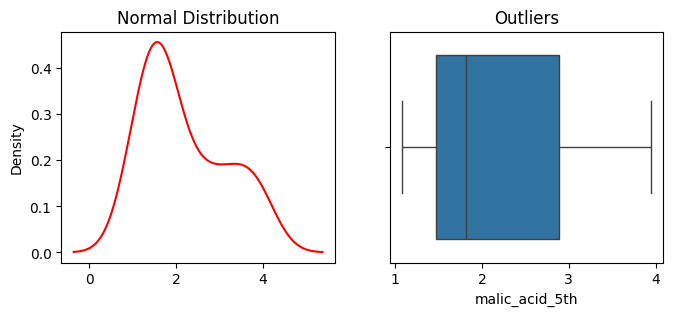

ash_5th


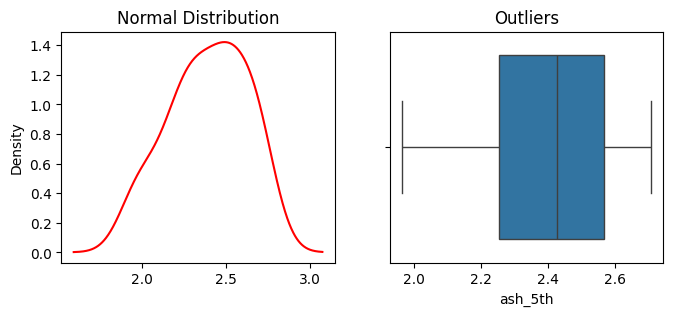

alcalinity_of_ash_5th


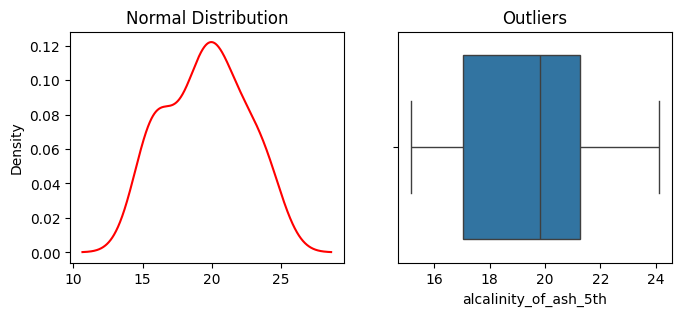

magnesium_5th


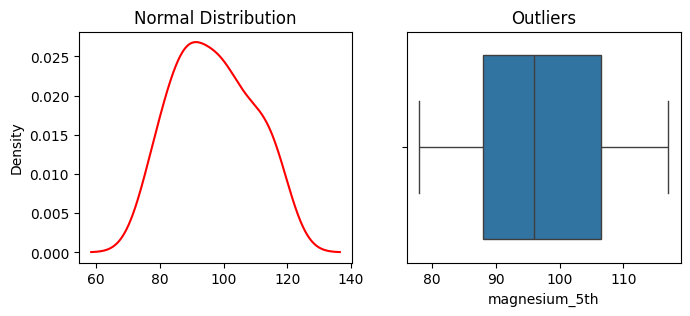

total_phenols_5th


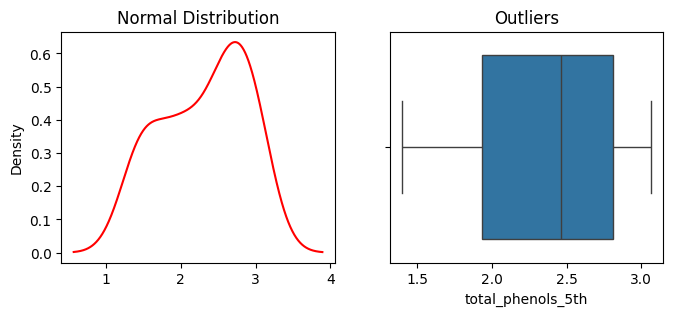

flavanoids_5th


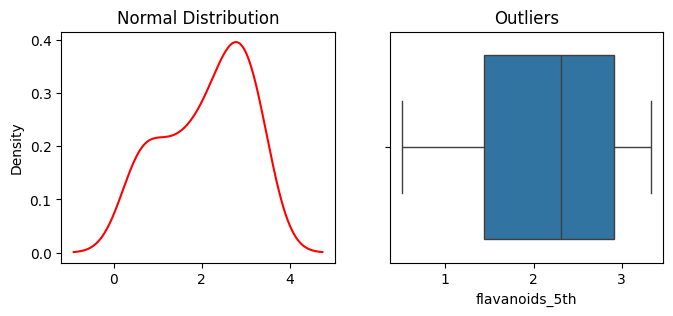

nonflavanoid_phenols_5th


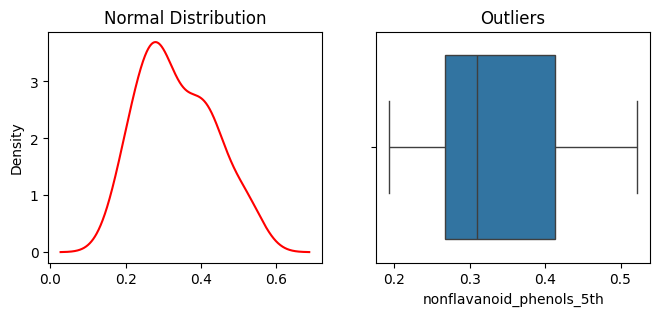

proanthocyanins_5th


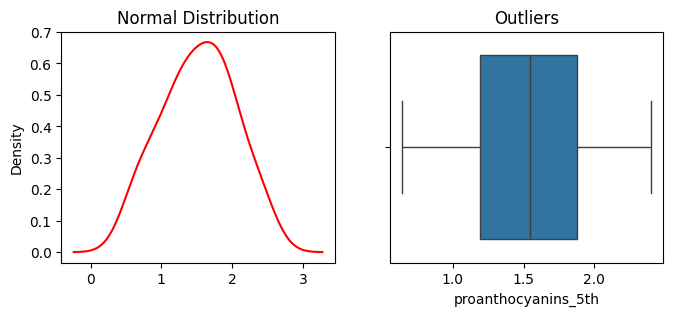

color_intensity_5th


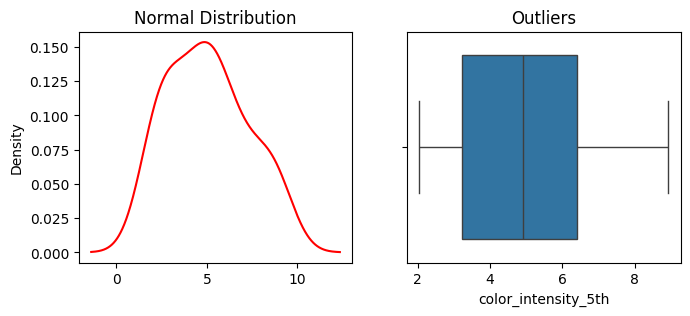

hue_5th


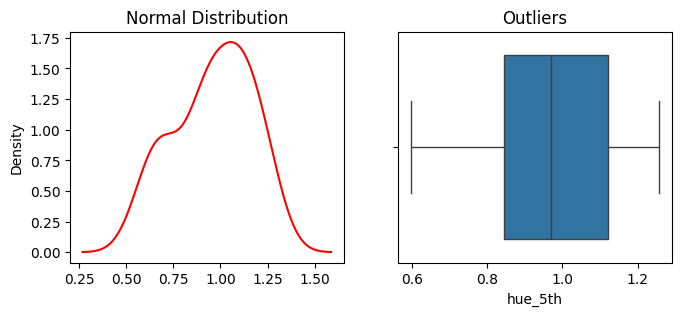

od280/od315_of_diluted_wines_5th


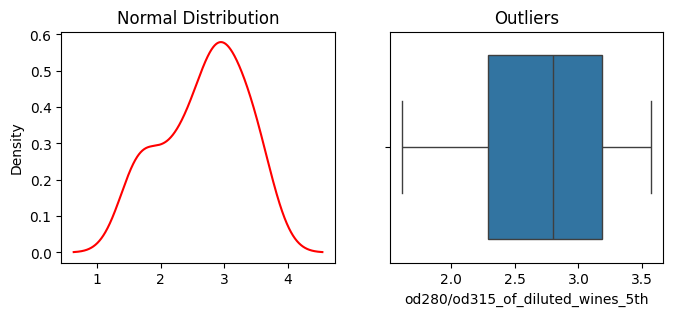

proline_5th


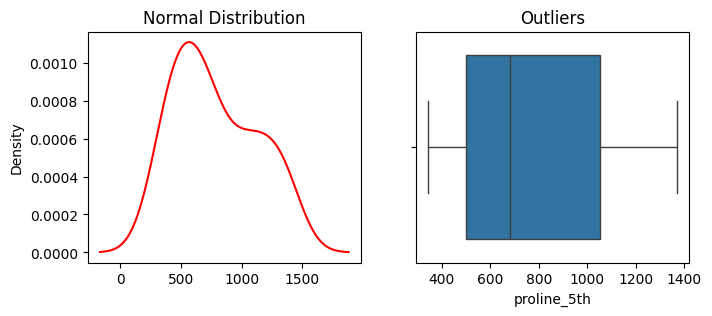

In [14]:
for i in X_test.columns:
  if '_5th' in i:
    outlier_checking(X_test,i)

Finally we have Handled the Outliers For both training part and Testing Part

#To select best column
**Feature Selection Part on X_train_num_cols and X_test_Num_cols**

- `constant technique = variance 0`
- `quasi constant technique `
- `correlation with p_value [Hypothesis Testing ]`

In [15]:
# Constant technique
from sklearn.feature_selection import VarianceThreshold

con_tech = VarianceThreshold(threshold=0.0)
con_tech.fit(X_train)
X_train.columns[con_tech.get_support()]

Index(['alcohol_5th', 'malic_acid_5th', 'ash_5th', 'alcalinity_of_ash_5th',
       'magnesium_5th', 'total_phenols_5th', 'flavanoids_5th',
       'nonflavanoid_phenols_5th', 'proanthocyanins_5th',
       'color_intensity_5th', 'hue_5th', 'od280/od315_of_diluted_wines_5th',
       'proline_5th'],
      dtype='object')

In [16]:
constant = X_train.columns[~con_tech.get_support()]  # this show which columns are having varience is equal to zero

len(constant)

0

In [17]:
# Quasi constant = variance 0.1

con_tech = VarianceThreshold(threshold=0.1)
con_tech.fit(X_train)
X_train.columns[con_tech.get_support()]


Index(['alcohol_5th', 'malic_acid_5th', 'alcalinity_of_ash_5th',
       'magnesium_5th', 'total_phenols_5th', 'flavanoids_5th',
       'proanthocyanins_5th', 'color_intensity_5th',
       'od280/od315_of_diluted_wines_5th', 'proline_5th'],
      dtype='object')

In [18]:
constant = X_train.columns[~con_tech.get_support()]

constant

Index(['ash_5th', 'nonflavanoid_phenols_5th', 'hue_5th'], dtype='object')

In [19]:
X_train=X_train.drop(['ash_5th', 'nonflavanoid_phenols_5th', 'hue_5th'],axis=1)

X_test=X_test.drop(['ash_5th', 'nonflavanoid_phenols_5th', 'hue_5th'],axis=1)

**Hypothesis testing**

In [20]:
# Know we are going to apply correlation with Hypothesis Testing concept
from scipy import stats
co_pval = []

for i in X_train.columns:
  co_pval.append(stats.pearsonr(X_train[i],y_train))

co_pval # to get correlation and p_value

[PearsonRResult(statistic=-0.30622408934851325, pvalue=0.00021033237318804902),
 PearsonRResult(statistic=0.46437253266202755, pvalue=5.844476394805995e-09),
 PearsonRResult(statistic=0.5625721366662658, pvalue=3.1900985057672915e-13),
 PearsonRResult(statistic=-0.24735463339199693, pvalue=0.0029996033992638906),
 PearsonRResult(statistic=-0.7021098634702516, pvalue=2.146167721898732e-22),
 PearsonRResult(statistic=-0.8692548953541017, pvalue=1.1338277733569858e-44),
 PearsonRResult(statistic=-0.5221622545780145, pvalue=2.656935494911264e-11),
 PearsonRResult(statistic=0.29271058736396055, pvalue=0.0004078239686396937),
 PearsonRResult(statistic=-0.8006816998186731, pvalue=5.9133486597579765e-33),
 PearsonRResult(statistic=-0.6328258898299347, pvalue=2.9456810347219503e-17)]

In [21]:
co_pval = np.array(co_pval) # to target only p_value
co_pval

array([[-3.06224089e-01,  2.10332373e-04],
       [ 4.64372533e-01,  5.84447639e-09],
       [ 5.62572137e-01,  3.19009851e-13],
       [-2.47354633e-01,  2.99960340e-03],
       [-7.02109863e-01,  2.14616772e-22],
       [-8.69254895e-01,  1.13382777e-44],
       [-5.22162255e-01,  2.65693549e-11],
       [ 2.92710587e-01,  4.07823969e-04],
       [-8.00681700e-01,  5.91334866e-33],
       [-6.32825890e-01,  2.94568103e-17]])

<Axes: >

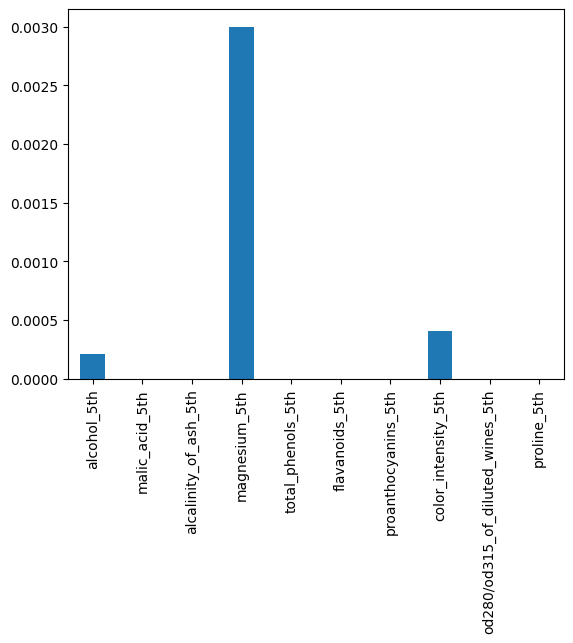

In [22]:
s = pd.Series(data = co_pval[: , 1],index = X_train.columns) # to get each column p_value
s.plot.bar()

In [23]:
# the magnesium_5th column  has > 0.05 we can remove that column

X_train=X_train.drop(['magnesium_5th'],axis=1)
X_test=X_test.drop(['magnesium_5th'],axis=1)

In [24]:
X_train.sample(5)

,alcohol_5th,malic_acid_5th,alcalinity_of_ash_5th,total_phenols_5th,flavanoids_5th,proanthocyanins_5th,color_intensity_5th,od280/od315_of_diluted_wines_5th,proline_5th
57,13.29,1.97,16.8,3.00,3.2300,1.66,6.00,2.84,1270.0
44,13.05,1.77,17.0,3.00,3.0000,2.03,5.04,3.35,885.0
61,12.64,1.36,16.8,2.02,1.4100,0.80,5.75,1.59,450.0
161,13.69,3.26,20.0,1.83,0.5705,0.80,5.88,1.82,680.0
163,12.96,3.45,18.5,1.39,0.7000,0.94,5.28,1.75,675.0


In [25]:
# standard_scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
res = sc.transform(X_train)

#res -> to give scaled down outputs

scaled_X_train = pd.DataFrame(data=res)
scaled_X_train.columns = X_train.columns

scaled_X_train.head()

,alcohol_5th,malic_acid_5th,alcalinity_of_ash_5th,total_phenols_5th,flavanoids_5th,proanthocyanins_5th,color_intensity_5th,od280/od315_of_diluted_wines_5th,proline_5th
0,1.614659,-0.634565,1.865674,0.862632,-0.710110,2.045432,2.193012,-0.903353,-0.248521
1,-0.572707,2.143161,1.865674,-0.830474,-1.454107,-0.948526,-0.003566,-1.290306,-0.760420
2,-0.778638,-1.213694,-0.318629,1.698288,1.569558,0.642014,-0.237993,0.257504,-0.248521
3,0.650004,-0.644075,1.025558,0.527363,-0.930166,1.278231,2.193012,-1.161322,-0.389735
4,0.122307,-0.805736,-1.326769,0.192095,0.683574,-0.443296,-0.613075,0.142851,1.022401


In [26]:
# to apply same thing on test data

res = sc.transform(X_test)

scaled_X_test = pd.DataFrame(data=res)
scaled_X_test.columns =X_test.columns

scaled_X_test.head()

,alcohol_5th,malic_acid_5th,alcalinity_of_ash_5th,total_phenols_5th,flavanoids_5th,proanthocyanins_5th,color_intensity_5th,od280/od315_of_diluted_wines_5th,proline_5th
0,0.855934,0.715785,-1.427583,0.694997,1.092248,0.099359,0.043319,1.103067,0.404592
1,1.570255,1.516960,-0.184210,0.946449,0.694052,-0.667842,0.108959,1.060072,1.234222
2,-0.057882,0.440009,0.521488,-1.249560,-1.551036,-1.603455,-0.191107,-0.401748,-0.460341
3,0.971770,-0.805736,1.025558,1.197900,1.322782,1.446641,0.324631,0.171515,1.957942
4,-0.778638,-1.119550,0.051022,-0.294045,0.012929,-1.060800,-0.153599,1.275046,-0.778072


In [27]:
def knn_algo(x_train,y_train,x_test,y_test):
  knn_res = KNeighborsClassifier(n_neighbors=5) # default k_value is 5
  knn_res.fit(x_train,y_train)
  y_test_pred = knn_res.predict(x_test)
  print(f'Training Accuracy : {knn_res.score(x_train,y_train)}')
  print(f'Test Accuracy : {knn_res.score(x_test,y_test)}')

  print(f'Confusion Matrix Test data : {confusion_matrix(y_test,y_test_pred)}')
  print(f'classification Report Test data : {classification_report(y_test,y_test_pred)}')

In [28]:
def naive_bayes_algo(x_train,y_train,x_test,y_test):
  nav_res = GaussianNB()
  nav_res.fit(x_train,y_train)
  y_test_pred = nav_res.predict(x_test)
  print(f'Training Accuracy : {nav_res.score(x_train,y_train)}')
  print(f'Test Accuracy : {nav_res.score(x_test,y_test)}')

  print(f'Confusion Matrix Test data : {confusion_matrix(y_test,y_test_pred)}')
  print(f'classification Report Test data : {classification_report(y_test,y_test_pred)}')

In [29]:
def log_reg_algo(x_train,y_train,x_test,y_test):
  lg_res = LogisticRegression()
  lg_res.fit(x_train,y_train)
  y_test_pred = lg_res.predict(x_test)
  print(f'Training Accuracy : {lg_res.score(x_train,y_train)}')
  print(f'Test Accuracy : {lg_res.score(x_test,y_test)}')

  print(f'Confusion Matrix Test data : {confusion_matrix(y_test,y_test_pred)}')
  print(f'classification Report Test data : {classification_report(y_test,y_test_pred)}')

In [30]:
def dt_algo(x_train,y_train,x_test,y_test):
  dt_res = DecisionTreeClassifier(criterion='entropy')
  dt_res.fit(x_train,y_train)
  y_test_pred = dt_res.predict(x_test)
  print(f'Training Accuracy : {dt_res.score(x_train,y_train)}')
  print(f'Test Accuracy : {dt_res.score(x_test,y_test)}')

  print(f'Confusion Matrix Test data : {confusion_matrix(y_test,y_test_pred)}')
  print(f'classification Report Test data : {classification_report(y_test,y_test_pred)}')

In [31]:

def rf_algo(x_train,y_train,x_test,y_test):
  rf_res = RandomForestClassifier(criterion='entropy',n_estimators=11)
  rf_res.fit(x_train,y_train)
  y_test_pred = rf_res.predict(x_test)
  print(f'Training Accuracy : {rf_res.score(x_train,y_train)}')
  print(f'Test Accuracy : {rf_res.score(x_test,y_test)}')

  print(f'Confusion Matrix Test data : {confusion_matrix(y_test,y_test_pred)}')
  print(f'classification Report Test data : {classification_report(y_test,y_test_pred)}')

In [32]:
def common(x_train,y_train,x_test,y_test):
  print('-----knn-------')
  knn_algo(x_train,y_train,x_test,y_test)
  print('-----Naive Bayes------')
  naive_bayes_algo(x_train,y_train,x_test,y_test)
  print('-----Logistic Regression-------')
  log_reg_algo(x_train,y_train,x_test,y_test)
  print('-----Decision Tree-------')
  dt_algo(x_train,y_train,x_test,y_test)
  print('-----Random Forest-------')
  rf_algo(x_train,y_train,x_test,y_test)

In [33]:
final_X_train = scaled_X_train.copy()
final_y_train = y_train.copy()
final_X_test = scaled_X_test.copy()
final_y_test = y_test.copy()

In [34]:
common(final_X_train,final_y_train,final_X_test,final_y_test)

-----knn-------
Training Accuracy : 0.9788732394366197
Test Accuracy : 0.9444444444444444
Confusion Matrix Test data : [[14  0  0]
 [ 1 12  1]
 [ 0  0  8]]
classification Report Test data :               precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.86      0.92        14
           2       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36

-----Naive Bayes------
Training Accuracy : 0.9507042253521126
Test Accuracy : 0.9722222222222222
Confusion Matrix Test data : [[14  0  0]
 [ 1 13  0]
 [ 0  0  8]]
classification Report Test data :               precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.93      0.96        14
           2       1.00      1.00      1.00         8

    accuracy  

In [35]:
from sklearn.metrics import precision_score

# Define KNN algorithm
def knn_algo(x_train, y_train, x_test, y_test):
    knn_res = KNeighborsClassifier(n_neighbors=5)
    knn_res.fit(x_train, y_train)
    y_test_pred = knn_res.predict(x_test)
    precision = precision_score(y_test, y_test_pred, average='macro')

    return precision

# Define other algorithms similarly
def naive_bayes_algo(x_train, y_train, x_test, y_test):
    nb = GaussianNB()
    nb.fit(x_train, y_train)
    y_test_pred = nb.predict(x_test)
    precision = precision_score(y_test, y_test_pred, average='macro')
    return precision

def log_reg_algo(x_train, y_train, x_test, y_test):
    lr = LogisticRegression()
    lr.fit(x_train, y_train)
    y_test_pred = lr.predict(x_test)
    precision = precision_score(y_test, y_test_pred, average='macro')
    return precision

def dt_algo(x_train, y_train, x_test, y_test):
    dt = DecisionTreeClassifier()
    dt.fit(x_train, y_train)
    y_test_pred = dt.predict(x_test)
    precision = precision_score(y_test, y_test_pred, average='macro')
    return precision

def rf_algo(x_train, y_train, x_test, y_test):
    rf = RandomForestClassifier()
    rf.fit(x_train, y_train)
    y_test_pred = rf.predict(x_test)
    precision = precision_score(y_test, y_test_pred, average='macro')
    return precision

# Common function to find the best precision
def common(x_train, y_train, x_test, y_test):
    precisions = {}

    print('-----KNN-------')
    precisions['KNN'] = knn_algo(x_train, y_train, x_test, y_test)

    print('-----Naive Bayes------')
    precisions['Naive Bayes'] = naive_bayes_algo(x_train, y_train, x_test, y_test)

    print('-----Logistic Regression-------')
    precisions['Logistic Regression'] = log_reg_algo(x_train, y_train, x_test, y_test)

    print('-----Decision Tree-------')
    precisions['Decision Tree'] = dt_algo(x_train, y_train, x_test, y_test)

    print('-----Random Forest-------')
    precisions['Random Forest'] = rf_algo(x_train, y_train, x_test, y_test)

    # Find the model with the best precision
    best_model = max(precisions, key=precisions.get)
    print(f"\nBest Model: {best_model} with Precision: {precisions[best_model]:.4f}")

common(final_X_train,final_y_train,final_X_test,final_y_test)


-----KNN-------
-----Naive Bayes------
-----Logistic Regression-------
-----Decision Tree-------
-----Random Forest-------

Best Model: Logistic Regression with Precision: 1.0000


In [36]:
#naive bayes algorithm has high precision value

from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB


parameters = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  # Smoothing values
}

# Initialize the GridSearchCV object
grid_model = GridSearchCV(GaussianNB(), parameters, cv=10)

# Fit the model
grid = grid_model.fit(final_X_train, final_y_train)

# Get the best parameters
print("Best parameters for Naive Bayes:", grid.best_params_)


Best parameters for Naive Bayes: {'var_smoothing': 1e-09}


In [37]:
#  Apply Best parameters

final_model =GaussianNB(var_smoothing = 1e-09)
final_model.fit(X_train, y_train)



print(f'Final Test Accuracy : {final_model.score(final_X_test,final_y_test)}')

Final Test Accuracy : 0.3888888888888889


In [38]:
# Save the model

import pickle
with open ('wine.pkl','wb') as f:
  pickle.dump(final_model,f)

In [39]:
#Save the scaling

import pickle
with open('scaled_data.pkl','wb') as f:
   pickle.dump(sc,f)

In [40]:
final_X_train.columns

Index(['alcohol_5th', 'malic_acid_5th', 'alcalinity_of_ash_5th',
       'total_phenols_5th', 'flavanoids_5th', 'proanthocyanins_5th',
       'color_intensity_5th', 'od280/od315_of_diluted_wines_5th',
       'proline_5th'],
      dtype='object')

**ANN**

In [42]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.activations import relu,sigmoid,softmax

In [43]:
# define the architecture
model = Sequential()

# input to 1st Hidden layer
model.add(Dense(units=128,kernel_initializer='he_uniform',activation=relu,input_dim=final_X_train.shape[1]))


# outcome from 1st H.Layer will be given to 2nd H.Layer
model.add(Dense(units=64,kernel_initializer='he_uniform',activation=relu))


# outcome from 2nd H.Layer will be given to 3rd H.Layer
model.add(Dense(units=32,kernel_initializer='he_uniform',activation=relu))

# outcome from 3rd H.Layer will be given to 4th H.Layer
model.add(Dense(units=16,kernel_initializer='he_uniform',activation=relu))


# outcome from 4th H.Layer will be given to 5th H.Layer
model.add(Dense(units=8,kernel_initializer='he_uniform',activation=relu))


# outcome from 5th H.Layer will be given to output layer
model.add(Dense(units=3,kernel_initializer='glorot_uniform',activation=softmax))

In [44]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,307 (48.07 KB)

 Trainable params: 12,307 (48.07 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
# metrics
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])


In [48]:
y_train_p = tensorflow.keras.utils.to_categorical(y_train,num_classes=3)
y_train_p

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0

In [49]:
# Train the Model
model.fit(final_X_train,y_train_p,batch_size=20,validation_split=0.2,epochs=50)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - acc: 0.3872 - loss: 1.4214 - val_acc: 0.6552 - val_loss: 0.9477
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.6980 - loss: 0.8310 - val_acc: 0.7586 - val_loss: 0.6567
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.7951 - loss: 0.6040 - val_acc: 0.8966 - val_loss: 0.4472
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.8637 - loss: 0.4658 - val_acc: 0.9655 - val_loss: 0.2685
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.9140 - loss: 0.3405 - val_acc: 0.9655 - val_loss: 0.1775
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.9441 - loss: 0.2143 - val_acc: 0.9655 - val_loss: 0.1298
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.9639 - loss: 0.1399 - val_acc: 0.9655 - val_loss: 0.1035
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.9754 - loss: 0.1161 - val_acc: 0.9310 - val_loss: 0.0964
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - acc: 0.9826 - loss: 0.1113 - 

In [52]:


outcome = model.predict(X_test)
for i in outcome:
  if np.argmax(i) == 0:
    print('class 0')
  elif np.argmax(i) == 1:
    print('class 1')
  else:
    print('class 2')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
class 0
class 0
class 0
class 0
class 0
class 0
class 0
class 0
class 0
class 0
class 0
class 0
class 0
class 0
class 0
class 0
class 0
class 0
class 0
class 0
class 0
class 0
class 0
class 0
class 0
class 0
class 0
class 0
class 0
class 0
class 0
class 0
class 0
class 0
class 0
class 0


In [57]:
outcome = model.predict(final_X_test)
d = []
for i in outcome:
  if np.argmax(i) == 0:
    d.append(0)
  elif np.argmax(i) == 1:
    d.append(1)
  else:
    d.append(2)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [58]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [60]:
accuracy_score(final_y_test,d)

0.9722222222222222

In [62]:
confusion_matrix(final_y_test,d)

array([[14,  0,  0],
       [ 1, 13,  0],
       [ 0,  0,  8]])

In [63]:
print(classification_report(final_y_test,d))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.93      0.96        14
           2       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36

